#Directory, Libraries and data

In [13]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [14]:
#Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [15]:
# Load Data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Normal Distribution

<Axes: ylabel='Density'>

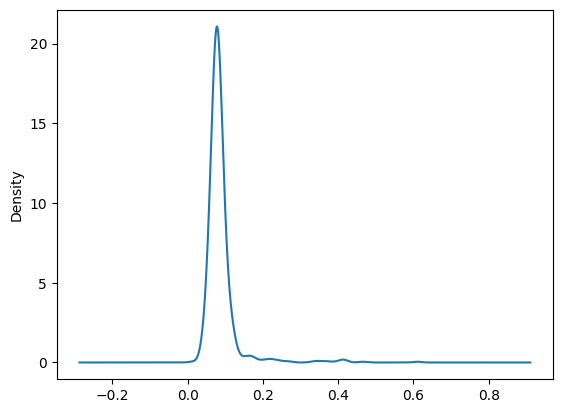

In [16]:
#Density plot of Chlorides
df.chlorides.plot.density()

In [17]:
#Check the # of observations within X standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std()) &
       (df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9718574108818011

In [18]:
# Challenge : find what is the share of observations within 3 standard devations of alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

#Shapiro-Wilks Test

In [19]:
#Shapiro-Wilks for normality
stat, p = st.shapiro(df.chlorides)
print(p)
#condition
if p > 0.05:
  #if yes
  print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
  print('Sample does not look Gaussian/Normal (reject H0)')

0.0
Sample does not look Gaussian/Normal (reject H0)


In [20]:
#Shapiro Wilks Test for Sulphates and create if else condition
stat, p = st.shapiro(df.sulphates)
print(p)

#condition
if p > 0.05:
  #if yes
  print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
  print('Sample does not look Gaussian/Normal (reject H0)')

5.821617678881608e-38
Sample does not look Gaussian/Normal (reject H0)


#Standard Error

In [21]:
#Using a function
st.sem(df.alcohol)

0.026650018979018173

In [22]:
#Us doing the computations: Standard deviations divided by square root of observation
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

In [23]:
#Standard Error of pH
print(st.sem(df.pH))
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784


0.0038608683325203784

#Confidence Interval

In [24]:
#Confidence interval of the mean of citric acid
print(df[['citric acid']].mean())
st.norm.interval(alpha = 0.95,
                 loc=df[['citric acid']].mean(),
                 scale=st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


TypeError: ignored

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

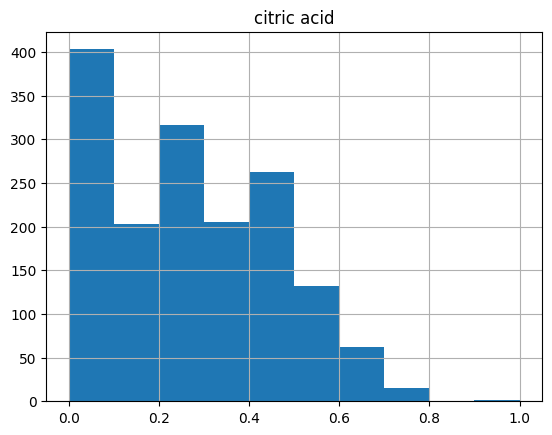

In [25]:
#Histogram
df[['citric acid']].hist()

In [26]:
#Confidence interval of the Density mean
# Significance level (1 - alpha) for the confidence interval
alpha = 1 - 0.95

# Assuming df is your DataFrame containing the "density" data
data = df[['density']]
mean_density = data.mean()
sem_density = st.sem(data)

# Calculate the confidence interval
confidence_interval = st.norm.interval(1 - alpha, loc=mean_density, scale=sem_density)

print(confidence_interval)

(array([0.99665417]), array([0.99683919]))


array([[<Axes: title={'center': 'density'}>]], dtype=object)

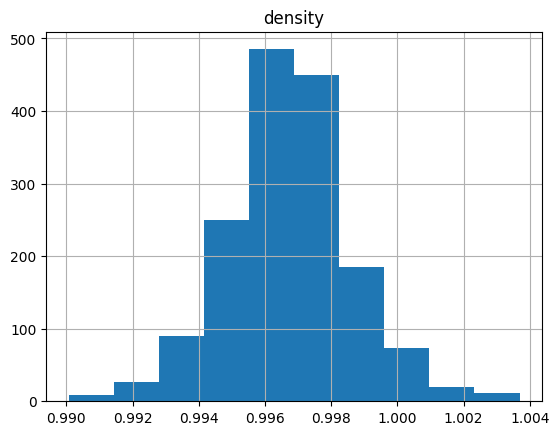

In [27]:
#Histogram of Density mean
df[['density']].hist()

#T-Test

In [28]:
#load data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
#subset
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary

In [30]:
#T-test
st.ttest_ind(a = salary_uk, b = salary_de)
print(p)
if p > 0.05:
  print('Both countries have similar salaries(fail to reject H0)')
else:
  print('There is a difference in salaries (reject H0)')

5.821617678881608e-38
There is a difference in salaries (reject H0)


In [31]:
#T-test in experience between India and United States
experience_ind = data.loc[data.Country == 'India'].YearsCodedJob
experience_usa = data.loc[data.Country == 'United States'].YearsCodedJob

In [32]:
st.ttest_ind(a = experience_ind, b = experience_usa)
print(p)
if p > 0.05:
  print('Both countries have similar salaries(fail to reject H0)')
else:
  print('There is a difference in salaries (reject H0)')

5.821617678881608e-38
There is a difference in salaries (reject H0)


<Axes: >

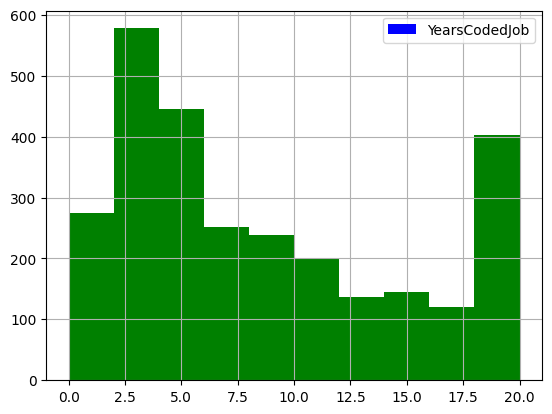

In [33]:
#Histograms
experience_ind.hist(legend = True, color='blue')
experience_usa.hist(color='green')

#Chi-square Test

In [34]:
#cross tabulation
tab = pd.crosstab(index = data.Country,
                  columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [42]:
#chi-square test
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)
if p > 0.05:
  print("there is no relationship (fail to reject H0)")
else:
  print("There is a strong relationship(reject H0)")

3.321120877301216e-16
There is a strong relationship(reject H0)


In [45]:
#chi-square test between company size and hobbies
tab2 = pd.crosstab(index = data.Hobby,
                  columns = data.CompanySizeNumber)
tab2

CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [47]:
chi2, p, dof, exp = st.chi2_contingency(tab2)
print(p)
if p > 0.05:
  print("there is no relationship (fail to reject H0)")
else:
  print("There is a strong relationship(reject H0)")

0.025708455559671013
There is a strong relationship(reject H0)
